### Load and Fix the Columns

In [2]:
import pandas as pd

# Load the data/amazon.csv
df = pd.read_csv('data/amazon.csv')
df = df.dropna()

df['rating'] = df['rating'].replace("|", 0)
df['rating'] = df['rating'].astype(float)

df['rating_count'] = df['rating_count'].replace(",", "", regex=True).astype(float)
df = df.dropna(subset=['rating_count'])

df['product_id'] = df['product_id'].astype(str).str.strip()
df = df.drop_duplicates(subset=['product_id'])

df["review_title"] = df["review_title"].astype("string")
df["review_content"] = df["review_content"].astype("string")

df['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [3]:
df_category = df['category'].str.split('|', expand=True).rename(
    columns={
        0:'category_1', 
        1:'category_2', 
        2:'category_3', 
        3:'category_4', 
        4:'category_5'
    }
)

df_category.head()

,category_1,category_2,category_3,category_4,category_5,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


### Data Cleaning

In [4]:
df_category.isna().sum()

category_1       0
category_2       0
category_3       8
category_4     150
category_5     909
5             1264
6             1336
dtype: int64

In [5]:
df["category_1"] = df_category["category_1"]
df["category_2"] = df_category["category_2"]
df["category_3"] = df_category["category_3"]

#Checking the missing value in columns
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
category_1             0
category_2             0
category_3             8
dtype: int64

In [6]:
df['category_1'].value_counts()

category_1
Electronics              490
Home&Kitchen             448
Computers&Accessories    373
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [7]:
df['category_1'] = (df['category_1'].str
                    .replace("&", " & ").str
                    .replace("Homelmprovement", "Home lmprovement").str
                    .replace("Musicallnstruments", "Musical lnstruments").str
                    .replace("OfficeProducts", "Office Products"))

In [8]:
df['category_2'] = df['category_2'].str.replace('&', " & ").str.replace(',', " , ")

In [9]:
df['discounted_price'] = df['discounted_price'].str.replace("₹", '').str.replace(',', '').astype(float)

In [10]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

In [11]:
df['actual_price'] = df['actual_price'].str.replace("₹", '').str.replace(',', '').astype(float)

In [12]:
df["rating_count"]

0       24269.0
1       43994.0
2        7928.0
3       94363.0
4       16905.0
         ...   
1460     1090.0
1461     4118.0
1462      468.0
1463     8031.0
1464     6987.0
Name: rating_count, Length: 1349, dtype: float64

In [13]:
df["user_id"] = df['user_id'].str.split(',', expand=False)
df['user_name'] = df['user_name'].str.split(',', expand=False)
df1 = df.explode("user_name", ignore_index=True)
df2 = df.explode("user_id", ignore_index=True)

df1.drop("user_id", axis=1, inplace=True)
df1["user_id"] = df2["user_id"]
df1.shape

(10605, 19)

In [14]:
df_user = pd.DataFrame({"user_id":df1["user_id"], "user_name":df1["user_name"]})
df_user.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


# Data Analysis

### Trending Product Category

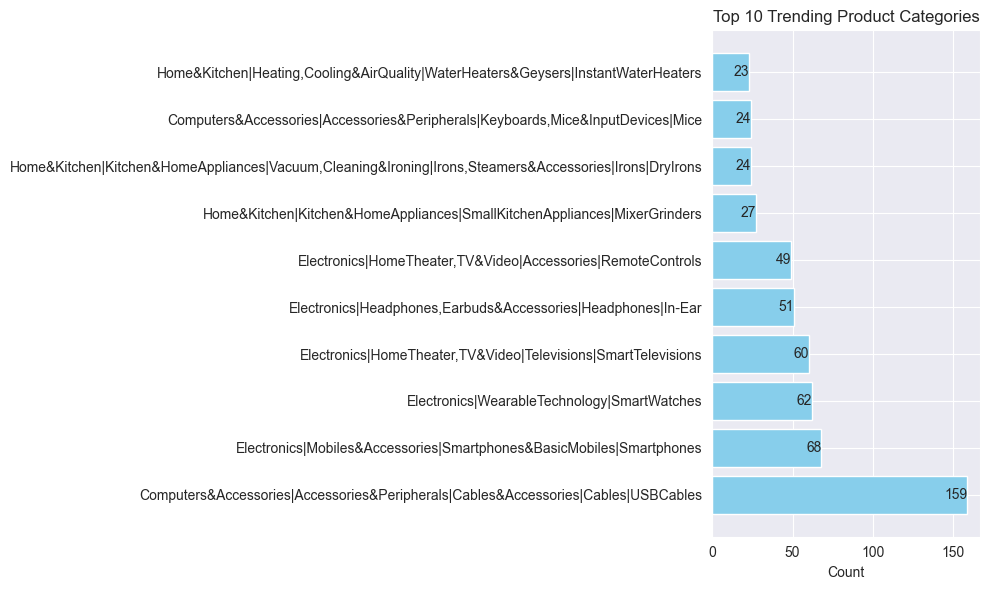

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

trending_categories = df['category'].value_counts()

# Sort the categories in descending order to find the highest to lowest trending categories
sorted_categories = trending_categories.sort_values(ascending=False)

# Select only the top 10 categories
top_10_categories = sorted_categories.head(10)

# Create a horizontal bar chart for the top 10 categories
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(top_10_categories.index, top_10_categories.values, color='skyblue')
plt.title('Top 10 Trending Product Categories')
plt.xlabel('Count')

# Add labels to the bars
for i, v in enumerate(top_10_categories.values):
    plt.text(v, i, str(v), ha='right', va='center')

plt.tight_layout()
plt.show()

### Correlation Between Rating Count and Rating of Product

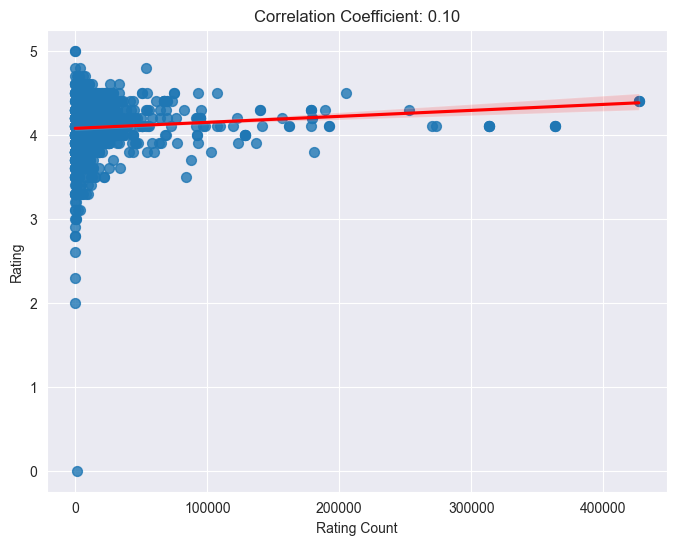

In [16]:
# Calculate the correlation coefficient
correlation_coefficient = df['rating'].corr(df['rating_count'])

# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(y='rating', x='rating_count', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.ylabel('Rating')
plt.xlabel('Rating Count')
plt.grid(True)
plt.show()

## User Reviews with Rating for Top 5 Best and Worst Products

### Top 5 Worst Product Rating with Review

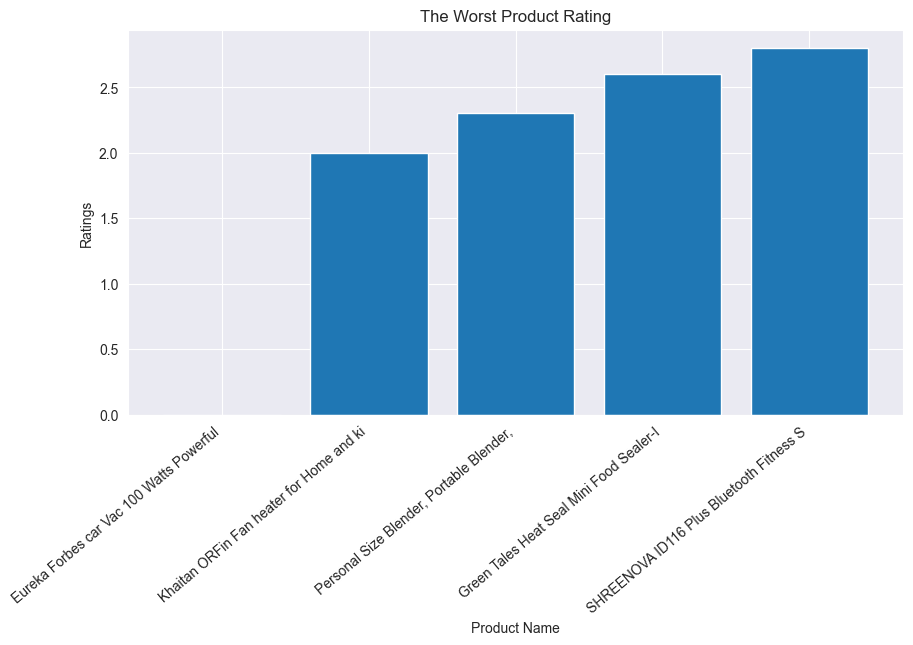

In [17]:
df.select_dtypes(exclude=["object", "category"])

product_rating = df.sort_values(by="rating")

# Plot the top 5 worst product rating
plt.figure(figsize=(10, 5))
plt.bar(product_rating["product_name"].head().str[:40], product_rating["rating"].head())
plt.title("The Worst Product Rating")
plt.xlabel("Product Name")
plt.ylabel("Ratings")
plt.xticks(rotation=40, ha="right", fontsize=10)
plt.show()

In [18]:
for i in range(5):
    print('Product Name: ', product_rating.iloc[i].product_name, end='\n')
    print('Users: ', product_rating.iloc[i].user_name, end='\n')
    print('Rating: ', product_rating.iloc[i].rating, end='\n')
    print('Review Title: ', product_rating.iloc[i].review_title, end='\n\n')

Product Name:  Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)
Users:  ['Divya', 'Dr Nefario', 'Deekshith', 'Preeti', 'Prasanth R', 'Pradeep kashiram Tetgure.', 'Abhijin Janardhan', 'Prashant']
Rating:  0.0
Review Title:  Decent product,doesn't pick up sand,Ok ok,Must Buy,Good one for basic use with normal suction power,Super,First review,Perfect product for my car

Product Name:  Khaitan ORFin Fan heater for Home and kitchen-K0 2215
Users:  ['Manidipa Sengupta', 'Vidisha']
Rating:  2.0
Review Title:  Bad quality,Amazing product..

Product Name:  Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)
Users:  ['Manya', 'Been', 'Podili Parasuram', 'Rejoy Jacob', 'Priya']
Rating:  2.3
Review Title:  Nice product i recommend to buy,Do not buy!! Defective product,Wast of money,Very very

### Top 5 Best Product Rating with Review

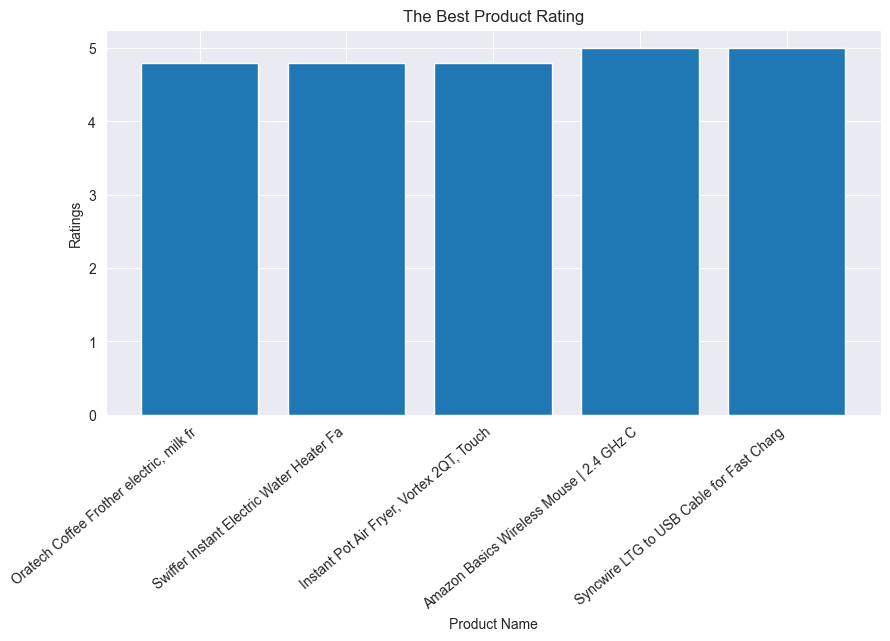

In [19]:
# Plot the top 5 best product rating
plt.figure(figsize=(10, 5))
plt.bar(product_rating["product_name"].tail().str[:40], product_rating["rating"].tail())
plt.title("The Best Product Rating")
plt.xlabel("Product Name")
plt.ylabel("Ratings")
plt.xticks(rotation=40, ha="right", fontsize=10)
plt.show()

In [20]:
for i in reversed(range(5)):
    print('Product Name: ', product_rating.tail().iloc[i].product_name, end='\n')
    print('Users: ', product_rating.tail().iloc[i].user_name, end='\n')
    print('Rating: ', product_rating.tail().iloc[i].rating, end='\n')
    print('Review Title: ', product_rating.tail().iloc[i].review_title, end='\n\n')

Product Name:  Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
Users:  ['Amazon Customer', 'kamal sahota', 'Pankaj', 'luvsmplcty', 'kanta']
Rating:  5.0
Review Title:  Good,Superb quality,Good products  nice one,Working well with iphone11.,I always rely on this companys products , so very good. Thank you so much

Product Name:  Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
Users:  ['Rambeer kumar', 'Ramesh', 'Digambar Shelke', 'awadhesh Kumar', 'Agrim Shamra', 'mahima', 'harpreet singh', 'Rajat Semwal']
Rating:  5.0
Review Title:  Very responsive and stylish mouse,Simply Awesome,Satisfactory but OTG not working,Satisfied with this wireless mouse,Overall performance is good.,Overall very happy with the product,Strong build with silent click,Excel